## Load data

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

runID = 2

pkl_fname = f'./Data/Ilic_Dynamics_run{runID}.pkl'
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

timeL = data['timeL']
timeM = data['timeM']

YL = data['YL']
x = YL[0]
y = YL[1]
vx = YL[2]
vy = YL[3]
phiM = data['phiM']
phidotM = data['phidot']

eps = data['eps']
epsdot = data['epsdot']

h = data['step']

## Truncate

In [5]:
## Truncate data
t_start = 0
t_stop  = 1
timeL_trunc     = timeL     [ (timeL >0) & (timeL < t_stop) ]
timeM_trunc     = timeM     [ (timeL >0) & (timeL < t_stop) ]
y_trun          = y         [ (timeL >0) & (timeL < t_stop) ]
vy_trun         = vy        [ (timeL >0) & (timeL < t_stop) ]
phiM_trun       = phiM      [ (timeL >0) & (timeL < t_stop) ]
phidotM_trun    = phidotM   [ (timeL >0) & (timeL < t_stop) ]

[Text(0.5, 0, 'Frame $\\mathcal{M}$ time (s)'),
 Text(0, 0.5, "$\\dot{\\phi}'$ (rad/s)")]

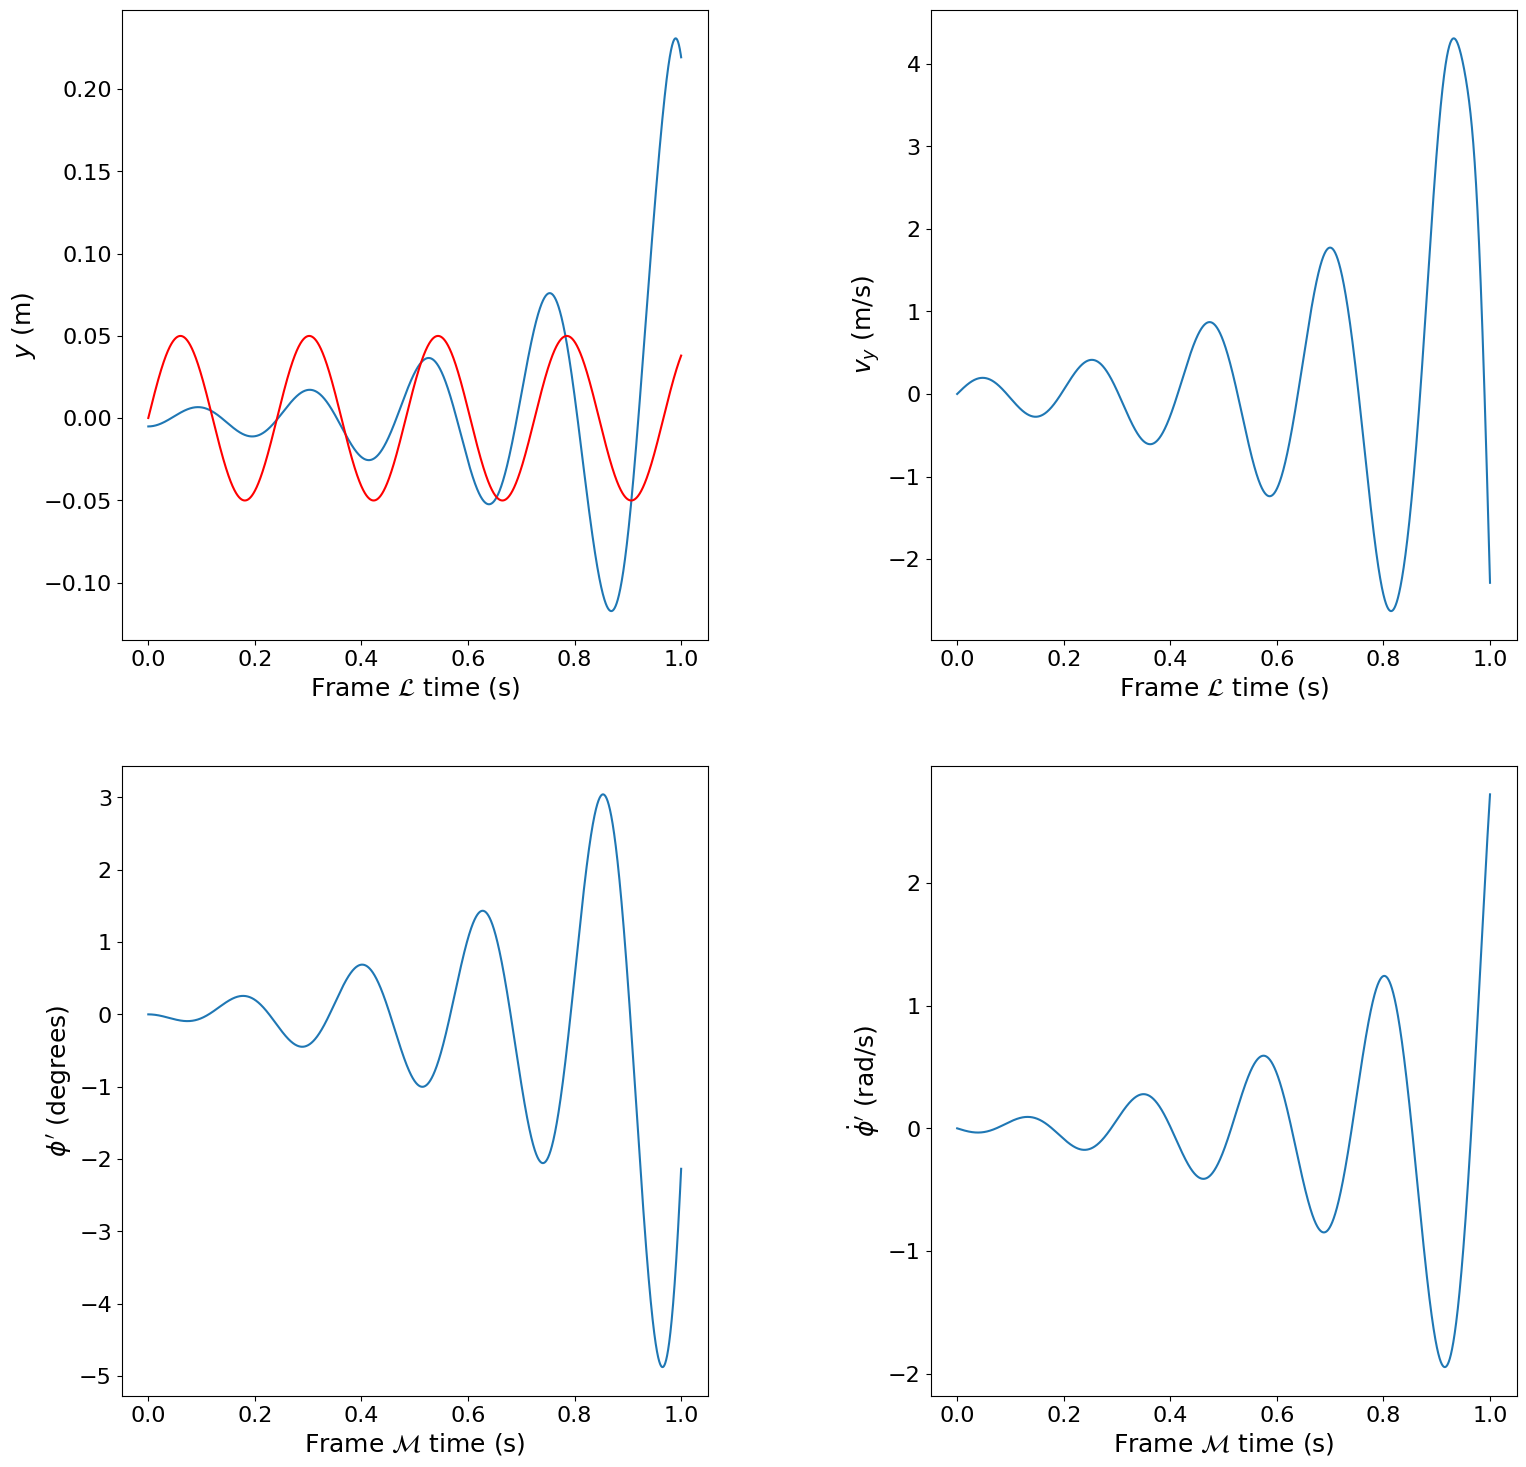

In [72]:
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.1,1), figsize=(18,18))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(timeL_trunc, y_trun)
# ax2a.plot(timeL_trunc, 0.5e-2*(np.exp(4*timeL_trunc)-1) )
ax2a.plot(timeL_trunc, 0.005*10*np.sin(52/2*timeL_trunc),'red' )
ax2b.plot(timeL_trunc, vy_trun)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y$ (m)")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trun)
ax3b.plot(timeM_trunc, phidotM_trun)
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rad/s)")


## Fourier transforms

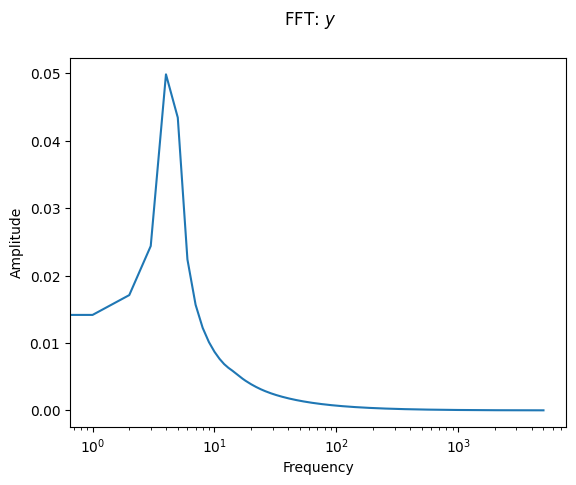

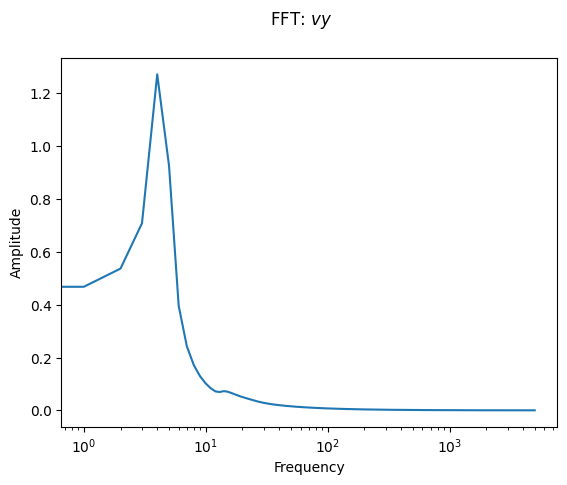

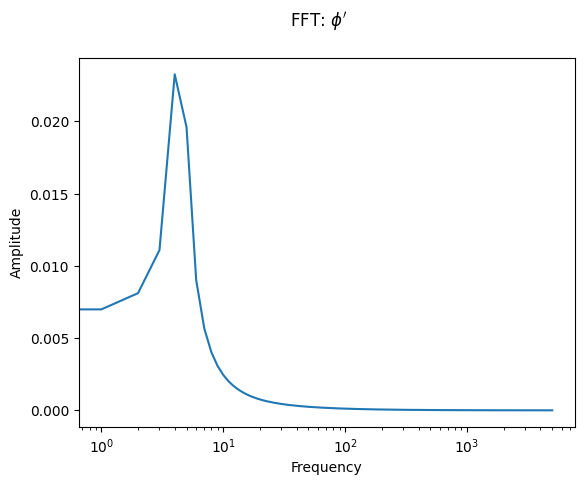

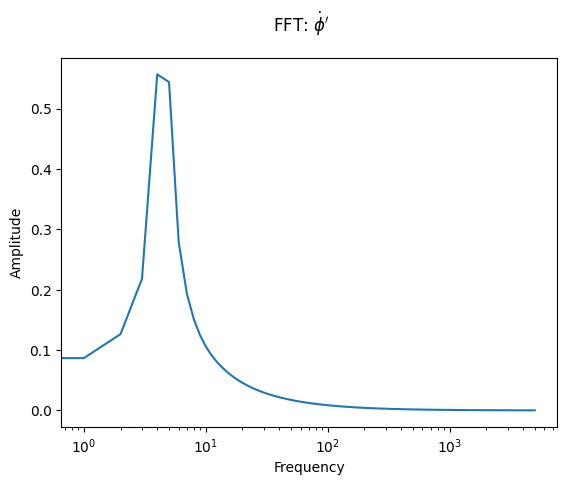

In [11]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def FFT(y,title):
    N = len(y)
    yf = fft(y)
    xf = fftfreq(N, h)[:N//2]
    fig, ax = plt.subplots(1)
    ax.semilogx(xf, 2.0/N * np.abs(yf[0:N//2]))
    ax.set(xlabel="Frequency", ylabel="Amplitude")
    fig.suptitle(title)
    return fig, ax

_, _ = FFT(y_trun,"FFT: $y$")
_, _ = FFT(vy_trun,"FFT: $vy$")
_, _ = FFT(phiM_trun,"FFT: $\phi'$")
_, _ = FFT(phidotM_trun,"FFT: $\dot{\phi}'$")

## Ilic eigenvalues

In [17]:
import sys
sys.path.append("../")
from twobox import TwoBox
from parameters import D1_ND
wavelength=1.5 /D1_ND(5.3/100)

grating_pitch=1.8 / wavelength
grating_depth=0.5 / wavelength
box1_width=0.15 * grating_pitch
box2_width=0.35 * grating_pitch
box_centre_dist=0.60 * grating_pitch
box1_eps = 3.5**2 
box2_eps = 3.5**2
gaussian_width=2 * 10
substrate_depth=0.5 / wavelength
substrate_eps=1.45**2

wavelength=1

grating_pitch   = np.float64(grating_pitch)
grating_depth   = np.float64(grating_depth)
box1_width      = np.float64(box1_width)
box2_width      = np.float64(box2_width)
box_centre_dist = np.float64(box_centre_dist)
box1_eps        = np.float64(box1_eps)
box2_eps        = np.float64(box2_eps)
gaussian_width  = np.float64(gaussian_width)
substrate_depth = np.float64(substrate_depth)
substrate_eps   = np.float64(substrate_eps)

In [48]:
grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, 0., 100, 25, np.inf)
real, imag = grating.Eigs()
imag
# 2*np.pi/ imag

array([ 16.98598473, -16.98598473,  51.67536623, -51.67536623])

## Testing

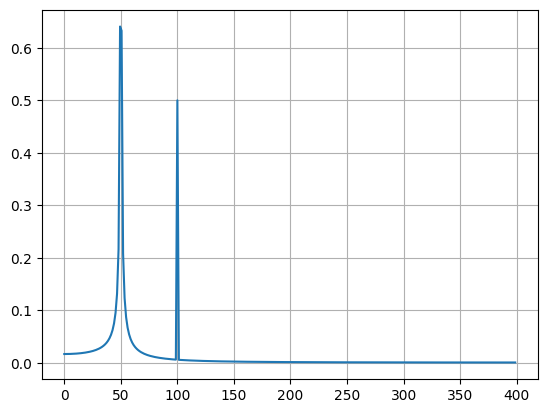

In [6]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(100.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()